In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
#Standard columns for all datasets
columns = [
    "Fishing", "TugTow", "Recreational", "Passenger" , "Cargo", "Tanker", "Other", "Unavailable", "Total"
]

target_fishing = "Fishing"
target_tugtow = "TugTow"
target_rec = "Recreational"
target_passenger = "Passenger"
target_cargo = "Cargo"
target_tanker = "Tanker"
target_other = "Other"
target_unavailable = "Unavailable"
target_total = "Total"

types = [target_fishing, target_tugtow, target_rec, target_passenger, target_cargo, target_tanker, target_other, target_unavailable, target_total]




In [5]:
#this will take in the clean data from the SQLite database
#set up engine will take place here first. 

file_path = Path('ml_data_daily_2018-19.csv')
df = pd.read_csv(file_path, index_col=False)
df.rename(columns = {'Unnamed: 0':'Date'}, inplace=True)

# Drop the null rows
df = df.dropna()
#df.sort_values(by='in', ascending=True)
df['Total'] = df.sum(axis=1)
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = (df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()


df = df.reset_index()
df.head(75)

,index,Date,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable,Total
0,0,2018-01-01,9,37,145,44,27,13,12,7,294
1,1,2018-01-02,13,45,119,41,27,14,19,10,288
2,2,2018-01-03,13,44,106,40,36,14,20,11,284
3,3,2018-01-04,15,44,103,45,30,10,15,12,274
4,4,2018-01-05,10,45,107,41,26,13,21,10,273
...,...,...,...,...,...,...,...,...,...,...,...
70,70,2018-03-12,12,38,144,58,35,17,18,10,332
71,71,2018-03-13,10,36,111,56,31,13,19,10,286
72,72,2018-03-14,11,44,121,56,37,14,18,8,309
73,73,2018-03-15,10,38,118,55,28,14,19,8,290


In [6]:
def ais_graphs():
    for boat_type in types:
        
        y = df[boat_type]
        # Create our features
        X =  df.drop(["Date", "Fishing","TugTow", "Recreational", "Passenger", "Cargo", "Tanker", "Other", "Unavailable", "Total"], axis=1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
        X_train.shape
        
        model = LinearRegression()
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = model.score(X_test, y_test)

        results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
        print("The Accuracy of this model is:")
        print(accuracy)
        plt.scatter(X,y, color="black")
        plt.plot(X_test, y_pred, color="blue", linewidth=3)
        plt.xlabel('# of Days (Starting January 1st, 2018)')
        plt.ylabel('# of Boats')
        plt.title(boat_type + " boats from 2018-2019")
        plt.show()

The Accuracy of this model is:
0.1390580825773513


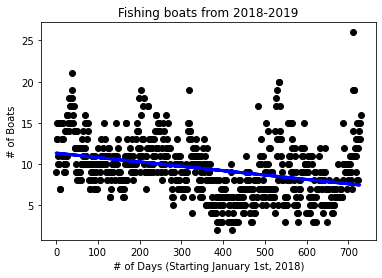

The Accuracy of this model is:
0.04057910872196713


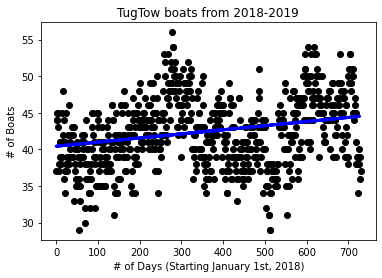

The Accuracy of this model is:
0.07325994993940299


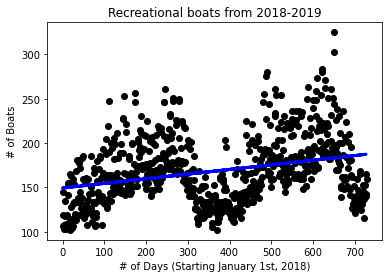

The Accuracy of this model is:
-0.0149754662087076


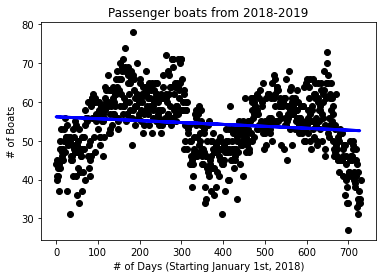

The Accuracy of this model is:
0.1367651003565823


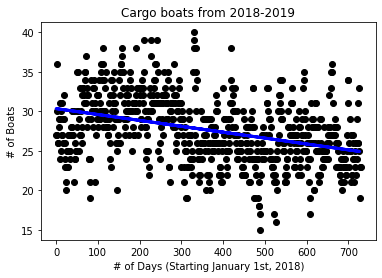

The Accuracy of this model is:
-0.0020740625086757003


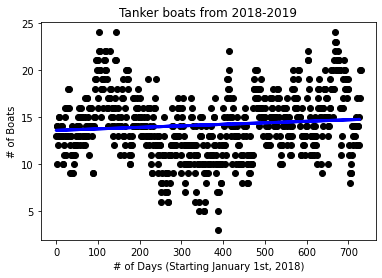

The Accuracy of this model is:
0.2216132092133578


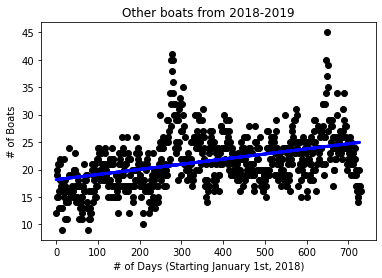

The Accuracy of this model is:
0.7074408002159882


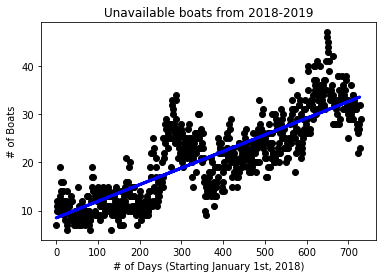

The Accuracy of this model is:
0.1372251881817491


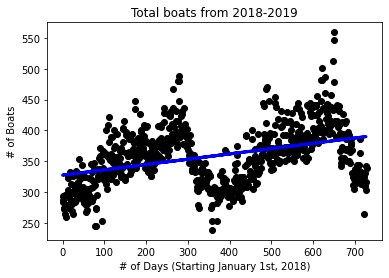

In [7]:
ais_graphs()